<a href="https://colab.research.google.com/github/lamiaehana/bertelsmann-technology-scholarship-program/blob/master/Training_Neural_Networks_Softmax()_with_helper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Neural Networks: Softmax() function

In [0]:
import torch
from torch import nn

In [0]:
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,) )
                                
])

In [6]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download = True, train = True, transform = transform)

0it [00:00, ?it/s]

9920512it [00:06, 1612594.23it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 128615.90it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:00, 2138521.97it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


8192it [00:00, 49290.32it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [9]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10)
)

#Define the loss
criterion = nn.CrossEntropyLoss()

#Get our data
images, labels = next(iter(trainloader))

#Flatten images
images = images.view(images.shape[0],-1)

#Forward pass  get our logits
logits = model(images)

#Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3306, grad_fn=<NllLossBackward>)


In [10]:
# Program softmax function
#Build a feed-foward network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1)
)

#Define the loss
criterion = nn.NLLLoss()

#Get our data
images, labels = next(iter(trainloader))

#Flatten images
images = images.view(images.shape[0],-1)

#Forward pass  get our logits
logps  = model(images)

#Calculate the loss with the logits and the labels
loss = criterion(logps , labels)

print(loss)

tensor(2.3108, grad_fn=<NllLossBackward>)


In [11]:
x = torch.randn(2,2,requires_grad=True)
print(x)

tensor([[-1.1839,  0.9933],
        [ 1.4422,  0.5271]], requires_grad=True)


In [12]:
y = x**2
print(y)

tensor([[1.4017, 0.9867],
        [2.0799, 0.2779]], grad_fn=<PowBackward0>)


In [13]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [14]:
z = y.mean()
print(z)

tensor(1.1865, grad_fn=<MeanBackward0>)


In [15]:
print(x.grad)

None


In [16]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.5920,  0.4967],
        [ 0.7211,  0.2636]])
tensor([[-0.5920,  0.4967],
        [ 0.7211,  0.2636]], grad_fn=<DivBackward0>)


In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [18]:

print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [-0.0042, -0.0042, -0.0042,  ..., -0.0042, -0.0042, -0.0042],
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        ...,
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006]])


In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [20]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0222, -0.0269, -0.0237,  ..., -0.0040, -0.0302,  0.0054],
        [ 0.0240,  0.0178, -0.0028,  ...,  0.0094,  0.0356,  0.0046],
        [ 0.0353, -0.0280,  0.0071,  ..., -0.0318,  0.0341,  0.0146],
        ...,
        [-0.0122,  0.0318, -0.0341,  ...,  0.0187,  0.0199, -0.0260],
        [ 0.0333, -0.0288, -0.0031,  ...,  0.0340, -0.0144, -0.0219],
        [ 0.0125,  0.0160, -0.0063,  ...,  0.0270, -0.0186, -0.0028]],
       requires_grad=True)
Gradient - tensor([[ 4.6599e-03,  4.6599e-03,  4.6599e-03,  ...,  4.6599e-03,
          4.6599e-03,  4.6599e-03],
        [ 2.9803e-03,  2.9803e-03,  2.9803e-03,  ...,  2.9803e-03,
          2.9803e-03,  2.9803e-03],
        [-6.2093e-04, -6.2093e-04, -6.2093e-04,  ..., -6.2093e-04,
         -6.2093e-04, -6.2093e-04],
        ...,
        [ 3.9537e-04,  3.9537e-04,  3.9537e-04,  ...,  3.9537e-04,
          3.9537e-04,  3.9537e-04],
        [-1.2987e-05, -1.2987e-05, -1.2987e-05,  ..., -1.2987e

In [21]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0221, -0.0269, -0.0237,  ..., -0.0040, -0.0302,  0.0054],
        [ 0.0240,  0.0177, -0.0028,  ...,  0.0093,  0.0356,  0.0045],
        [ 0.0353, -0.0280,  0.0071,  ..., -0.0318,  0.0341,  0.0146],
        ...,
        [-0.0122,  0.0318, -0.0342,  ...,  0.0187,  0.0199, -0.0260],
        [ 0.0333, -0.0288, -0.0031,  ...,  0.0340, -0.0144, -0.0219],
        [ 0.0126,  0.0160, -0.0063,  ...,  0.0271, -0.0186, -0.0027]],
       requires_grad=True)


In [22]:

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8940845520765797
Training loss: 0.8374513074406175
Training loss: 0.5199493714995476
Training loss: 0.42596753810578064
Training loss: 0.3829128430691609


In [25]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-12-17 22:06:04--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

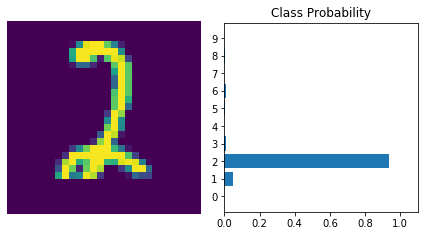

In [36]:
%matplotlib inline
#import helper
import matplotlib.pyplot as plt

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)